In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('/kaggle/input/directional-forecasting-in-cryptocurrencies/train.csv')
test_df = pd.read_csv('/kaggle/input/directional-forecasting-in-cryptocurrencies/test.csv')
train_df

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,target
0,1525471260,0.90120,0.90130,0.90120,0.90130,134.98,121.646459,4.0,125.08,112.723589,1.0
1,1525471320,0.90185,0.90195,0.90185,0.90195,1070.54,965.505313,12.0,879.94,793.612703,0.0
2,1525471380,0.90140,0.90140,0.90139,0.90139,2293.06,2066.963991,5.0,0.00,0.000000,0.0
3,1525471440,0.90139,0.90140,0.90138,0.90139,6850.59,6175.000909,19.0,1786.30,1610.149485,0.0
4,1525471500,0.90139,0.90139,0.90130,0.90130,832.30,750.222624,3.0,784.82,707.428900,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2122433,1652817240,0.43060,0.43060,0.42990,0.43040,136274.00,58630.162800,144.0,54216.00,23325.927700,1.0
2122434,1652817300,0.43030,0.43070,0.43030,0.43050,104478.00,44967.837600,99.0,52232.00,22484.030400,1.0
2122435,1652817360,0.43050,0.43120,0.43050,0.43090,212396.00,91526.987200,177.0,108324.00,46673.061600,0.0
2122436,1652817420,0.43110,0.43110,0.43040,0.43060,131047.00,56443.003800,107.0,32713.00,14097.148900,0.0


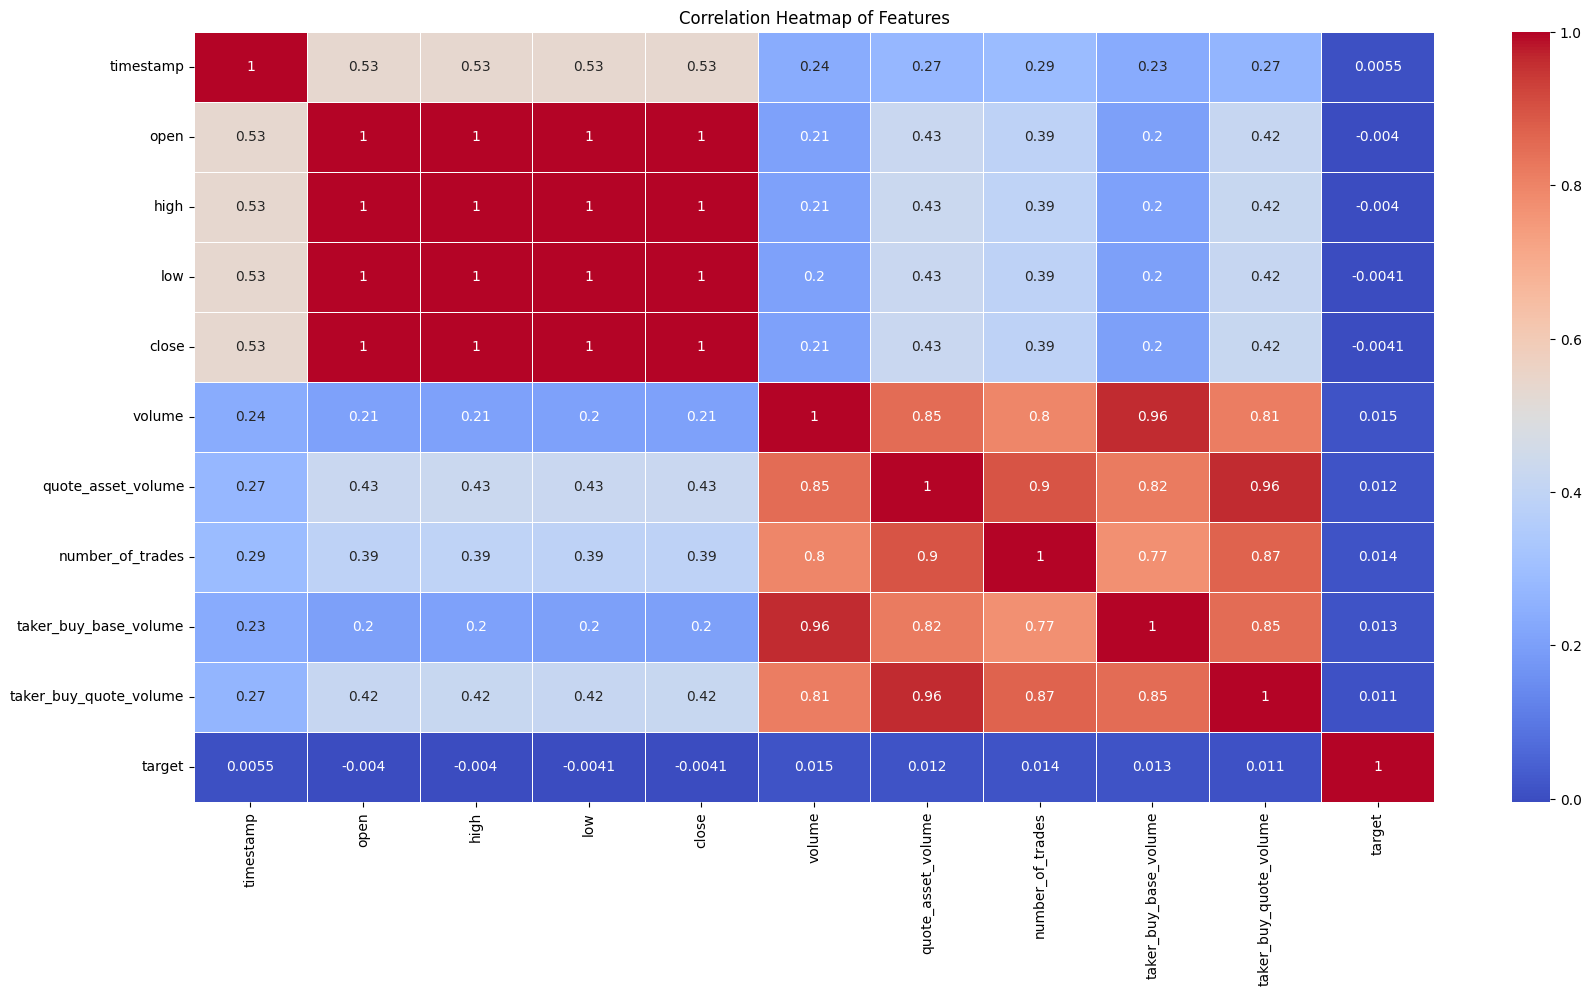

In [3]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

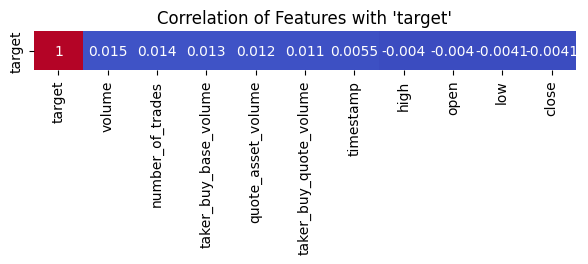

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = train_df.corr()

signal_corr = correlation_matrix[['target']].sort_values(by='target', ascending=False)

plt.figure(figsize=(7, 0.5))
sns.heatmap(signal_corr.T, annot=True, cmap='coolwarm', cbar=False)
plt.title("Correlation of Features with 'target'")
plt.show()


In [5]:
from datetime import datetime, timezone

train_df['timestamp'] = pd.to_datetime(train_df['timestamp'], unit='s')
train_df['minute'] = train_df['timestamp'].dt.minute
train_df.drop('timestamp', axis=1, inplace=True)

test_df['timestamp'] = pd.to_datetime(test_df['timestamp'], unit='s')
test_df['minute'] = test_df['timestamp'].dt.minute
test_df.drop('timestamp', axis=1, inplace=True)

In [6]:
#USING Z-SCORE METHOD TO GET RID OF OUTLIERS

z_threshold = 3

z_scores = np.abs((train_df - train_df.mean()) / train_df.std())

outliers = (z_scores > z_threshold)

print("Outliers:\n", train_df[outliers.any(axis=1)])

train_df = train_df[~outliers.any(axis=1)]

Outliers:
             open     high      low    close      volume  quote_asset_volume  \
107836   0.50566  0.50631  0.48507  0.50008   1822170.0        9.088897e+05   
108201   0.47580  0.47615  0.47500  0.47500   1145163.6        5.439815e+05   
197296   0.31937  0.32362  0.31937  0.32278   1811583.1        5.802121e+05   
199657   0.36803  0.37200  0.36778  0.37152   1346806.7        4.980468e+05   
200189   0.48499  0.49021  0.48356  0.49000   2875628.5        1.396135e+06   
...          ...      ...      ...      ...         ...                 ...   
2120984  0.42000  0.42800  0.41990  0.42790   2374477.0        1.006244e+06   
2120985  0.42790  0.44260  0.42790  0.43930  12363632.0        5.401453e+06   
2120986  0.43940  0.43940  0.43300  0.43450   3054547.0        1.332590e+06   
2120987  0.43450  0.43600  0.42480  0.42650   6367198.0        2.730539e+06   
2120988  0.42650  0.42750  0.42270  0.42270   2871307.0        1.220657e+06   

         number_of_trades  taker_buy_bas

In [7]:
train_df['close_shift_1'] = train_df.shift(-1)['close']
train_df['close_shift_2'] = train_df.shift(-2)['close']
train_df['close_shift_3'] = train_df.shift(-3)['close']
train_df['close_shift_4'] = train_df.shift(-4)['close']
train_df['close_shift_5'] = train_df.shift(-5)['close']


test_df['close_shift_1'] = test_df.shift(-1)['close']
test_df['close_shift_2'] = test_df.shift(-2)['close']
test_df['close_shift_3'] = test_df.shift(-3)['close']
test_df['close_shift_4'] = test_df.shift(-4)['close']
test_df['close_shift_5'] = test_df.shift(-5)['close']


/tmp/ipykernel_18/3596558217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['close_shift_1'] = train_df.shift(-1)['close']
/tmp/ipykernel_18/3596558217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['close_shift_2'] = train_df.shift(-2)['close']
/tmp/ipykernel_18/3596558217.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [8]:
def Feature_Engineering(df):
    train_df = pd.DataFrame(df)

    
#   train_df['true_range'] = train_df[['high', 'low', 'close']].max(axis=1) - train_df[['high', 'low', 'close']].min(axis=1)    -->BAD INDICATORS
#   train_df['atr'] = (train_df[['high', 'low', 'close']].max(axis=1) - train_df[['high', 'low', 'close']].min(axis=1)).rolling(window=14).mean()     -->BAD INDICATOR
    
    train_df['sma_5'] = train_df['close'].rolling(window=5).mean()
    train_df['sma_10'] = train_df['close'].rolling(window=10).mean()
    train_df['sma_shift_5'] = train_df['close_shift_1'].rolling(window=5).mean()
    train_df['sma_shiftmedian_5'] = train_df['close_shift_1'].rolling(window=5).median()
    train_df['sma_shiftmedian_10'] = train_df['close_shift_1'].rolling(window=10).median()

    
    train_df['sma_20'] = train_df['close'].rolling(window=20).mean()

    train_df['bb_up'] = train_df['sma_20'] + ((train_df['close'].rolling(window=20).std()) * 2)
    train_df['bb_low'] = train_df['sma_20'] - ((train_df['close'].rolling(window=20).std()) * 2)
    
    train_df['ema_5'] = train_df['close'].ewm(span=5, adjust=False).mean()
    train_df['ema_10'] = train_df['close'].ewm(span=10, adjust=False).mean()
    train_df['ema_shift_5'] = train_df['close_shift_1'].ewm(span=5, adjust=False).mean()
    train_df['ema_crossover'] = train_df['ema_5'] - train_df['ema_10']
    train_df['close_diff'] = train_df['close'] - train_df['close_shift_1']
    train_df['close_shift_1_volatility'] = train_df['close_shift_1'].rolling(window=10).std()
    
    train_df['close_shift_1_ma20'] = train_df['close_shift_1'].rolling(window=20).mean()
    train_df['close_shift_1_upper_bb'] = train_df['close_shift_1_ma20'] + 2 * train_df['close_shift_1_volatility']
    train_df['close_shift_1_lower_bb'] = train_df['close_shift_1_ma20'] - 2 * train_df['close_shift_1_volatility']
    train_df['close_momentum_5'] = train_df['close'] - train_df['close'].shift(5)
    train_df['close_to_shift_ratio'] = train_df['close'] / train_df['close_shift_1']

    
    return train_df





In [9]:
train_df = Feature_Engineering(train_df)
test_df = Feature_Engineering(test_df)


In [10]:
train_df = train_df.dropna()

In [11]:
train_df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'quote_asset_volume',
       'number_of_trades', 'taker_buy_base_volume', 'taker_buy_quote_volume',
       'target', 'minute', 'close_shift_1', 'close_shift_2', 'close_shift_3',
       'close_shift_4', 'close_shift_5', 'sma_5', 'sma_10', 'sma_shift_5',
       'sma_shiftmedian_5', 'sma_shiftmedian_10', 'sma_20', 'bb_up', 'bb_low',
       'ema_5', 'ema_10', 'ema_shift_5', 'ema_crossover', 'close_diff',
       'close_shift_1_volatility', 'close_shift_1_ma20',
       'close_shift_1_upper_bb', 'close_shift_1_lower_bb', 'close_momentum_5',
       'close_to_shift_ratio'],
      dtype='object')

In [12]:
from sklearn.model_selection import train_test_split

X, y = train_df.drop(columns=['target']), train_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42, n_estimators=110, n_jobs=-1, verbose=2, max_depth=40)
model.fit(X_train_scaled, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 110
building tree 2 of 110
building tree 3 of 110
building tree 4 of 110
building tree 5 of 110
building tree 6 of 110
building tree 7 of 110
building tree 8 of 110
building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.0min


building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
building tree 43 of 110
building tree 44 of 110
building tree 45 of 110
building tree 46 of 110
building tree 47 of 110
building tree 48 of 110
building tree 49 of 110
building tree 50 of 110
building tree 51 of 110
building tree 52 of 110
building tree 53 of 110
building tree 54 of 110
building tree 55 of 110
building tree 56 of 110
building tree 57 of 110
building tree 58 of 110
building tree 59 of 110
building tree 60 of 110
building tree 61 of 110
building tree 62 of 110
building tree 63 of 110
building tree 64 of 110
building tree 65 of 110
building tree 66 of 110
building tree 67 of 110
building tree 68 of 110
building tree 69 of 110
building tree 70 of 110
building tree 71 of 110
building tree 72 of 110
building tree 73 of 110
building tree 74 of 110
building tree 75 of 110
building tree 76 of 110
building tree 77 of 110
building tree 78 of 110
building tree 79

[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed: 12.7min finished


RandomForestClassifier(max_depth=40, n_estimators=110, n_jobs=-1,
                       random_state=42, verbose=2)

In [14]:
y_predictions = model.predict(X_test_scaled)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 110 out of 110 | elapsed:    2.7s finished


In [15]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_predictions))

print(classification_report(y_test, y_predictions))

0.9983227252418865
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    215042
         1.0       1.00      1.00      1.00    194551

    accuracy                           1.00    409593
   macro avg       1.00      1.00      1.00    409593
weighted avg       1.00      1.00      1.00    409593



In [16]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

importance_df

,feature,importance
27,close_diff,0.536047
33,close_to_shift_ratio,0.454401
28,close_shift_1_volatility,0.000878
32,close_momentum_5,0.000794
26,ema_crossover,0.000621
6,number_of_trades,0.000494
4,volume,0.000389
5,quote_asset_volume,0.000388
8,taker_buy_quote_volume,0.000362
7,taker_buy_base_volume,0.000345


In [17]:
tree_depths = [estimator.tree_.max_depth for estimator in model.estimators_]
tree_depths

[36,
 36,
 38,
 36,
 40,
 34,
 39,
 36,
 40,
 40,
 37,
 40,
 39,
 32,
 39,
 40,
 35,
 35,
 38,
 34,
 38,
 40,
 39,
 35,
 33,
 37,
 37,
 40,
 34,
 34,
 38,
 36,
 32,
 34,
 36,
 38,
 34,
 36,
 39,
 35,
 38,
 40,
 34,
 39,
 40,
 34,
 32,
 36,
 38,
 37,
 40,
 35,
 40,
 34,
 36,
 29,
 40,
 40,
 35,
 35,
 38,
 34,
 33,
 40,
 35,
 35,
 33,
 38,
 36,
 40,
 40,
 36,
 36,
 39,
 40,
 37,
 38,
 36,
 40,
 40,
 40,
 32,
 40,
 40,
 36,
 39,
 36,
 38,
 35,
 37,
 34,
 38,
 40,
 34,
 40,
 37,
 40,
 38,
 35,
 37,
 38,
 38,
 32,
 37,
 40,
 34,
 36,
 37,
 38,
 33]

In [18]:
input_cols=['open', 'high', 'low', 'close', 'volume', 'quote_asset_volume',
       'number_of_trades', 'taker_buy_base_volume', 'taker_buy_quote_volume',
       'minute', 'close_shift_1', 'close_shift_2', 'close_shift_3',
       'close_shift_4', 'close_shift_5', 'sma_5', 'sma_10', 'sma_shift_5',
       'sma_shiftmedian_5', 'sma_shiftmedian_10', 'sma_20', 'bb_up', 'bb_low',
       'ema_5', 'ema_10', 'ema_shift_5', 'ema_crossover', 'close_diff',
       'close_shift_1_volatility', 'close_shift_1_ma20',
       'close_shift_1_upper_bb', 'close_shift_1_lower_bb', 'close_momentum_5',
       'close_to_shift_ratio']

In [19]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  
test_df[input_cols] = imputer.fit_transform(test_df[input_cols])


In [20]:
test_df[input_cols] = scaler.transform(test_df[input_cols])

In [21]:
test_df = test_df.drop(['row_id'], axis=1)

In [22]:
test_df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'quote_asset_volume',
       'number_of_trades', 'taker_buy_base_volume', 'taker_buy_quote_volume',
       'minute', 'close_shift_1', 'close_shift_2', 'close_shift_3',
       'close_shift_4', 'close_shift_5', 'sma_5', 'sma_10', 'sma_shift_5',
       'sma_shiftmedian_5', 'sma_shiftmedian_10', 'sma_20', 'bb_up', 'bb_low',
       'ema_5', 'ema_10', 'ema_shift_5', 'ema_crossover', 'close_diff',
       'close_shift_1_volatility', 'close_shift_1_ma20',
       'close_shift_1_upper_bb', 'close_shift_1_lower_bb', 'close_momentum_5',
       'close_to_shift_ratio'],
      dtype='object')

In [23]:
test_target=model.predict(test_df)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 110 out of 110 | elapsed:    5.0s finished


In [24]:
submission = pd.DataFrame({
    'row_id': range(0, 909617),
    'target': test_target
})

submission.to_csv('submission.csv', index=False)